# Non-parametric tests   - Not normal
1] wilcoxon-sign test 
2] frideman test
3] mann-whitney test
4] kruskal wallies test 
5] chi-square test

In [1]:
''' 1] wilcoxon-sign test -Used to compare two paired (related) sample & 
data is continuous. (same person with two different situation)
'''
import pandas as pd
from scipy.stats import wilcoxon 

df=pd.read_excel("1 Wilcoxon.xlsx",sheet_name=0)
df.head()

,ID,TRT,AGE,WEIGHIN,STAGE,TOTALCIN,TOTALCW2,TOTALCW4,TOTALCW6
0,1,0,52,124.0,2,6,6,6,7
1,5,0,77,160.0,1,9,6,10,9
2,6,0,60,136.5,4,7,9,17,19
3,9,0,61,179.6,1,6,7,9,3
4,11,0,59,175.8,2,6,7,16,13


In [6]:
from scipy.stats import shapiro
_,p=shapiro(df.TOTALCIN)
if p < 0.05:
    print("reject h0 'not normal' ")
else:
    print('accept h0') # data normally distributed
    

reject h0 'not normal' 


In [7]:
from scipy.stats import shapiro
_,p=shapiro(df.TOTALCW4)
if p < 0.05:
    print("reject h0 'not normal' ")
else:
    print('accept h0') # data normally distributed
    

reject h0 'not normal' 


In [8]:
# applying wilcoxon test 
'''
H0 -> There is no significant difference in calcium level of the patient intial and after 4 weeks
HA -> There is significant difference in calcium level of the patient intial and after 4 weeks

p_value < 0.05 so we reject H0
'''
stats,p_value=wilcoxon(df['TOTALCIN'],df['TOTALCW4'])
p_value

C:\Users\Icon\anaconda3\lib\site-packages\scipy\stats\morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


8.584625213760735e-05

In [10]:
''' Friedman test : Used to compare 
more than two paired samples. (same person with more than two situations)
'''
#H0 -> There is no significant difference in calcium level of the patient intial ,after 4 weeks,after two weeks 
#H1 -> There is significant difference in calcium level of the patient intial,after 4 weeks,after two weeks 


from scipy.stats import friedmanchisquare
stats,p_value=friedmanchisquare(df['TOTALCIN'],df['TOTALCW2'],df['TOTALCW4'])
p_value

8.62133745016363e-07

In [12]:
p_value<0.05 # reject h0

True

In [20]:
'''The Mann-Whitney U test: Used to compare two independent data samples.

H0 : there is no significant diffrence in the design 1 and design 2
H1 :there is significant diffrence in the design 1 and design 2

here p_value >= 0.05  = so we accept H0
'''
from scipy.stats import mannwhitneyu

dataset1=pd.read_excel("3 Mann Whitney.xlsx",sheet_name=1)

dataset1.head()

,Design1,Design2
0,11,12
1,17,10
2,16,15
3,14,19
4,15,11


In [22]:
stats, p = mannwhitneyu(dataset1.Design1, dataset1.Design2)
print(stats, p)

9.0 0.2641796636354743


In [28]:
p >= 0.05 # accept  h0 

True

In [30]:
'''
Kruskal-Wallis H Test: Used to compare more than two independent samples.
'''
from scipy.stats import kruskal

dataset2=pd.read_excel("4 Kruskal Wallis.xlsx",sheet_name=0)

dataset2.head()

,Design1,Design2,Design3,Showroom
0,11,12,23,1
1,17,10,20,2
2,16,15,18,3
3,14,19,17,4
4,15,11,10,5


In [34]:
#H0 : there is no significant diffrence in the design 1 ,design 2 and 3
#H1 :there is significant diffrence in the design 1 , design 2 and 3

# here p_value >= 0.05  = so we accept H0

stat,p=kruskal(dataset2.Design1,dataset2.Design2,dataset2.Design3)
p >= 0.05 

True

In [38]:
'''
Chi Square test : Used to check the dependencies of variables. 
Used only when variables are Categorical
'''
#H0 : there is no relationship(dependency) exists between Attrition and BusinessTravel
#H1 : there is dependecy between Attrition and BusinessTravel

url = 'https://raw.githubusercontent.com/LetsUpgrade/AI-ML-July-2020/master/Day-7/Assignment/general_data.csv'
df = pd.read_csv(url)
pd.set_option('display.max_columns',None)
df.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4


In [47]:
from scipy.stats import chi2_contingency
# we need to find cross tabulation between variable

chitable = pd.crosstab(df.BusinessTravel,df.Attrition)
chitable

Attrition,No,Yes
BusinessTravel,,
Non-Travel,414,36
Travel_Frequently,624,207
Travel_Rarely,2661,468


In [48]:
stats, p, dof, expected=chi2_contingency(chitable)
p

1.764276972983189e-16

In [49]:
1.764276972983189e-16 < 0.05 # reject h0 

True

In [51]:
import seaborn as sns 

C:\Users\Icon\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

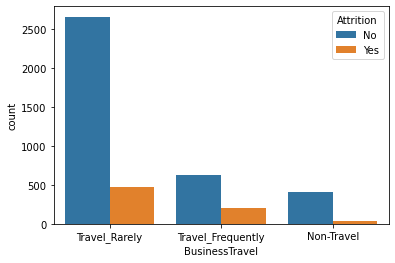

In [55]:
sns.countplot(df['BusinessTravel'],hue=df['Attrition'])

#  Parametric test 


In [59]:
'''1] One-sample t-test - it is use to compare sample mean(x) with
the population mean (mu) 

# population mean : we need to assume it 

H0: There is no significant difference of the mean of Feature against population mean = 65
H1: There is significant difference of the mean of Feature  against population mean = 65

'''
from scipy.stats import ttest_1samp

data=pd.read_excel("1. One Sample.xlsx",sheet_name=0)

data.head()

,ids,Height
0,43783,72.35
1,20278,70.66
2,20389,70.68
3,24559,67.43
4,28980,68.45


In [60]:
stat,p=ttest_1samp(data['Height'],65) # population mean = 65 assume 
p

1.087893570160242e-26

In [61]:
p < 0.05 # reject H0

True

In [64]:
'''
2] two-sample paired t test: To compare the mean of 2 paired samples
------------------------- 

Ho -> There is no significant difference in the mean of english and maths marks
H1 -> There is significant difference in the mean of english and maths marks

'''

from scipy.stats import ttest_rel

dataset3=pd.read_excel("2. Paired Sample.xlsx",sheet_name=0)

dataset3.head()

,ids,English,Math
0,43783,88.24,60.02
1,20278,89.45,70.19
2,20389,96.73,71.20
3,22820,74.06,55.89
4,24559,82.61,65.52


In [65]:
p1=dataset3.English

p2=dataset3.Math

stat,p=ttest_rel(p1,p2)
p

3.0710987192210606e-128

In [67]:
p<0.05 # reject H0

True

In [68]:
dataset3.Math.mean()

65.44683417085427

In [69]:
dataset3.English.mean()

82.7440954773869

In [71]:
'''
Two  Sample independent T-Test -> To compare the mean of 2 independent samples
------------------------

H0 -> There is no significant difference in the mean of duration b/w Athelete and Non Athelete
H1 -> There is significant difference in the mean of duration b/w Athelete and Non Athelete


'''
from scipy.stats import ttest_ind

dataset4=pd.read_excel("3. Independent Sample.xlsx",sheet_name=3)

dataset4.head()

z1=dataset4.Nonathelete

z2=dataset4.Athelete

stat,p=ttest_ind(z1,z2)

p

7.116633157230895e-33

In [72]:
p<0.05

True